In [18]:
import os
import pandas as pd



database = 'Diabetes'
#database = 'w3a'
#database = 'a5a'

#database = 'eunite2001'
#database = 'abalone'
#database = 'CPU_SMALL'

path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/decomposition-measurement-ii/'
results_directory = path + f'results/{database}/'  # Replace this with the path to your directory
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/'
tables_path = f'{analysis_files}/latex-tables/'

## columns names 
n_components_column_name = 'n-components'
total_training_time_mean_column = 'transform-and-training-time-mean'
total_training_time_std_column = 'transform-and-training-time-std'
# relevant column names 
transform_time_mean_column = 'transform-time-mean'
transform_time_std_column = 'transform-time-std'
training_time_mean_column = 'training-time-mean'
training_time_std_column = 'training-time-std'


# Get a list of all files in the directory
files = [file for file in os.listdir(results_directory) if os.path.isfile(os.path.join(results_directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
stats_files = [file for file in files if "stats" in file]
stats_files.sort() # kernel methods será el primero

kernel_files = [file for file in stats_files if ('kernel' in file and 'kernel-linear' not in file)]
random_features_files = [file for file in stats_files if file not in kernel_files]


# Create a DataFrame for random_features files
random_features_data = pd.DataFrame()
random_features_list = []
random_features_list_names = []
random_features_data_verbose = pd.DataFrame()
for file in random_features_files:
    # mean
    file_path = os.path.join(results_directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    data['File'] = file  # Add a column to identify the file 
    # 
    data[total_training_time_mean_column] = data[transform_time_mean_column] + data[training_time_mean_column]
    data[total_training_time_std_column] = data[transform_time_std_column] + data[training_time_std_column]

    random_features_data = pd.concat([random_features_data, data], ignore_index=True)
    random_features_list.append(data)
    random_features_list_names.append(file.replace('-stats.csv', ''))


kernel_data = pd.DataFrame()
kernel_data_verbose = pd.DataFrame()
kernel_list = []
kernel_list_names = []
for file in kernel_files:
    file_path = os.path.join(results_directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed

    data['File'] = file  # Add a column to identify the file
    data.rename(columns={'score-in-test-mean': 'score-mean', 'score-in-test-std': 'score-std'}, inplace=True)
    data[total_training_time_mean_column] = data[training_time_mean_column]
    data[total_training_time_std_column] = data[training_time_std_column]

    kernel_data = pd.concat([kernel_data, data], ignore_index=True)
    kernel_list.append(data)
    kernel_list_names.append(file.replace('-stats.csv', ''))

print('Ridge files')
print(kernel_list_names)
print('kernel files')
print(kernel_list_names)
kernel_data



['results.dict', 'RFF-SVC-kernel-linear-stats.csv', 'Nystroem-SVC-kernel-linear-stats.csv', 'Nystroem-linear-SVC-stats.csv', 'RFF-linear-SVC-stats.csv', 'kernel-SVC-verbose.csv', 'RFF-verbose.csv', 'Nystroem-verbose.csv', 'kernel-SVC-stats.csv']
Ridge files
['kernel-SVC']
kernel files
['kernel-SVC']


,training-time-mean,training-time-std,prediction-time-mean,prediction-time-std,score-mean,score-std,File,transform-and-training-time-mean,transform-and-training-time-std
0,0.003405,0.000051,0.002354,0.000016,0.800866,0.0,kernel-SVC-stats.csv,0.003405,0.000051


In [19]:
random_features_data

,n-components,fit-time-mean,fit-time-std,transform-time-mean,transform-time-std,training-time-mean,training-time-std,prediction-time-mean,prediction-time-std,score-mean,score-std,File,transform-and-training-time-mean,transform-and-training-time-std
0,27,0.000917,0.001410,0.000917,0.000778,0.004632,0.000165,0.001165,0.000012,0.804473,0.003259,Nystroem-SVC-kernel-linear-stats.csv,0.005549,0.000943
1,31,0.000335,0.000013,0.000335,0.002932,0.004676,0.000101,0.001246,0.000008,0.805195,0.000000,Nystroem-SVC-kernel-linear-stats.csv,0.005011,0.003033
2,36,0.000372,0.000015,0.000372,0.002666,0.004798,0.000128,0.001316,0.000055,0.806638,0.002235,Nystroem-SVC-kernel-linear-stats.csv,0.005171,0.002795
3,41,0.000811,0.000372,0.000811,0.000663,0.005118,0.000160,0.001424,0.000040,0.804473,0.003259,Nystroem-SVC-kernel-linear-stats.csv,0.005929,0.000823
4,45,0.000650,0.000090,0.000650,0.001460,0.005281,0.000154,0.001507,0.000023,0.802309,0.002235,Nystroem-SVC-kernel-linear-stats.csv,0.005930,0.001614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,143,0.000173,0.000018,0.000173,0.002523,0.029962,0.003110,0.000047,0.000004,0.801587,0.005061,RFF-linear-SVC-stats.csv,0.030135,0.005633
116,147,0.000184,0.000049,0.000184,0.000034,0.029958,0.001691,0.000083,0.000057,0.808081,0.005243,RFF-linear-SVC-stats.csv,0.030142,0.001725
117,152,0.000164,0.000006,0.000164,0.001083,0.028759,0.005282,0.000089,0.000060,0.800866,0.004742,RFF-linear-SVC-stats.csv,0.028923,0.006365
118,156,0.000158,0.000006,0.000158,0.000035,0.028390,0.004494,0.000420,0.000566,0.804473,0.003259,RFF-linear-SVC-stats.csv,0.028548,0.004529


In [20]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File", column, n_components_column_name]]
   
      return dataframe

In [21]:
# get columns to be plot
mean_columns_to_be_plot = [column for column in random_features_data.columns if 'mean' in column]
std_columns_to_be_plot = [column for column in random_features_data.columns if 'std' in column]


# Sort by score 

In [22]:
show_dataframe(random_features_data,'score-mean' , ascending=False, n_rows=10)

,File,score-mean,n-components
107,RFF-linear-SVC-stats.csv,0.809,106
116,RFF-linear-SVC-stats.csv,0.808,147
86,RFF-SVC-kernel-linear-stats.csv,0.808,147
79,RFF-SVC-kernel-linear-stats.csv,0.807,115
2,Nystroem-SVC-kernel-linear-stats.csv,0.807,36
...,...,...,...
90,RFF-linear-SVC-stats.csv,0.797,27
61,RFF-SVC-kernel-linear-stats.csv,0.796,31
60,RFF-SVC-kernel-linear-stats.csv,0.796,27
98,RFF-linear-SVC-stats.csv,0.795,64


# Plotting 

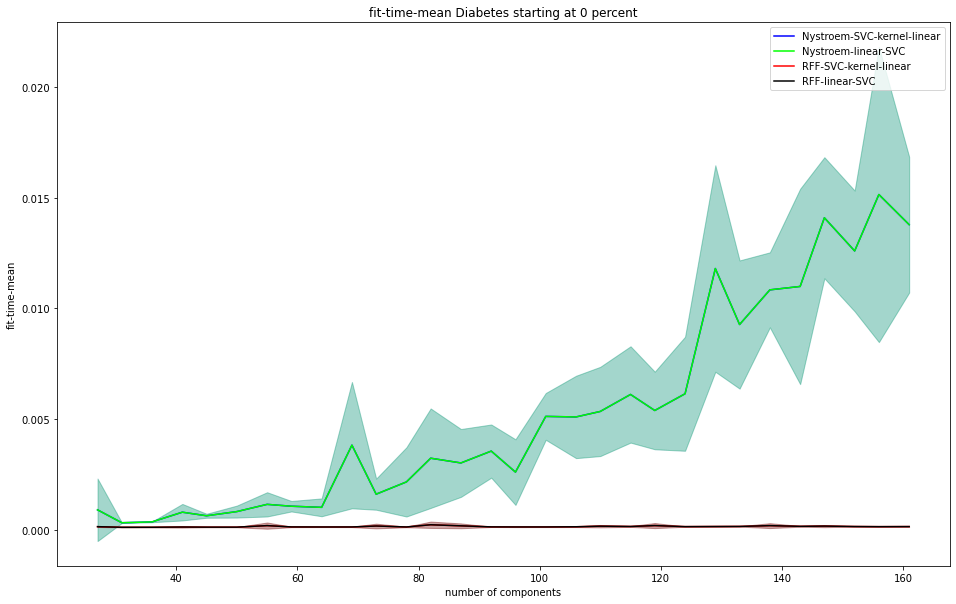

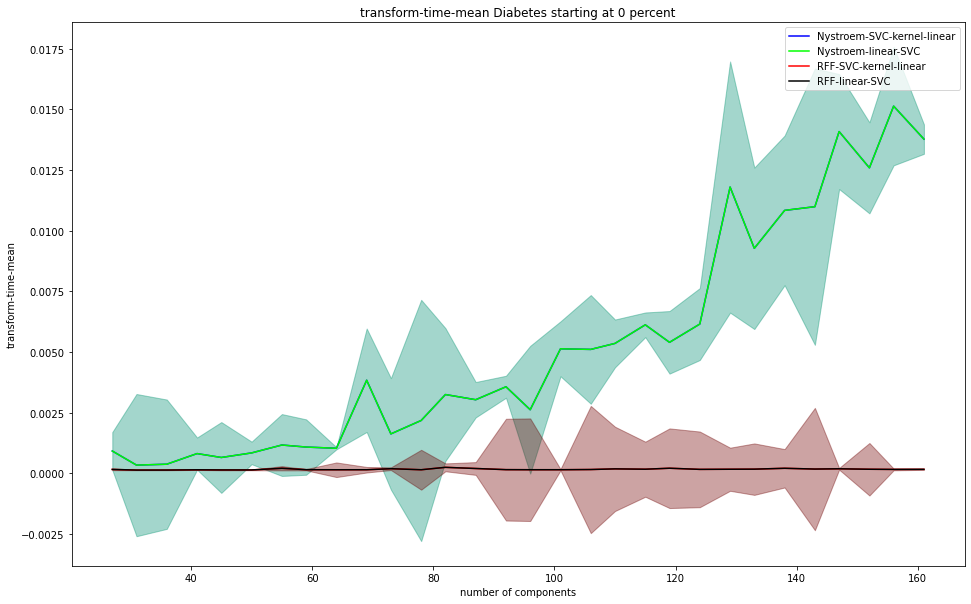

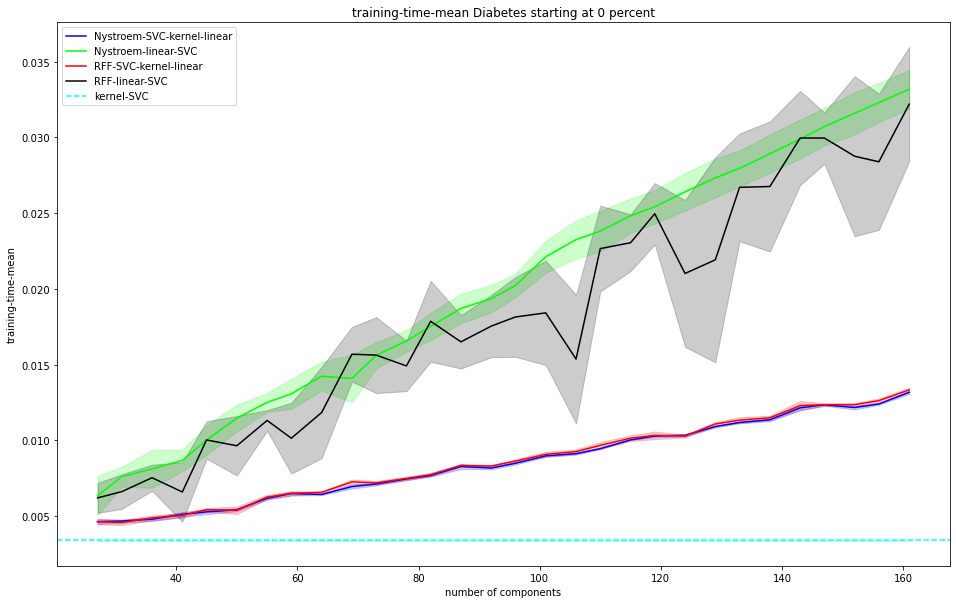

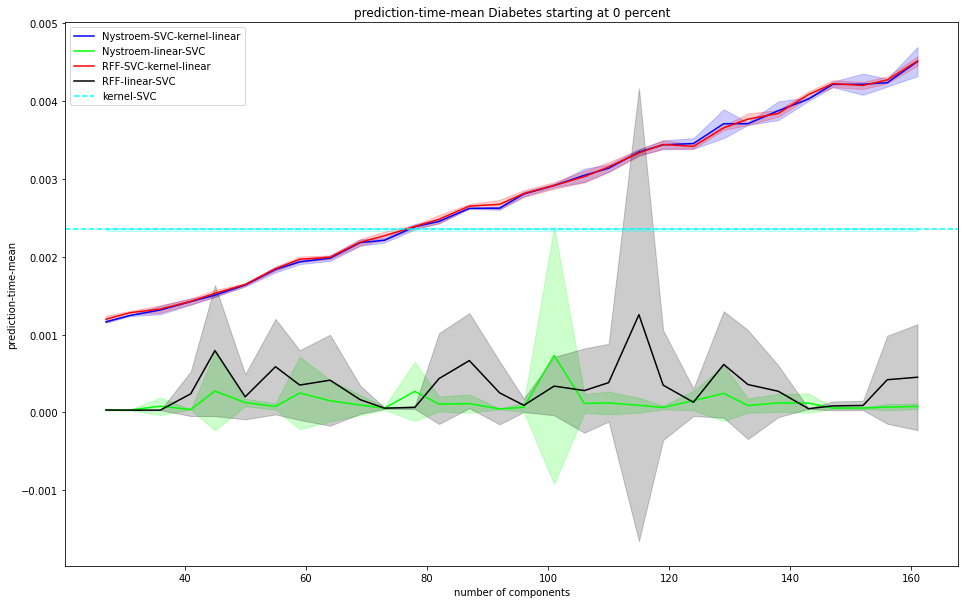

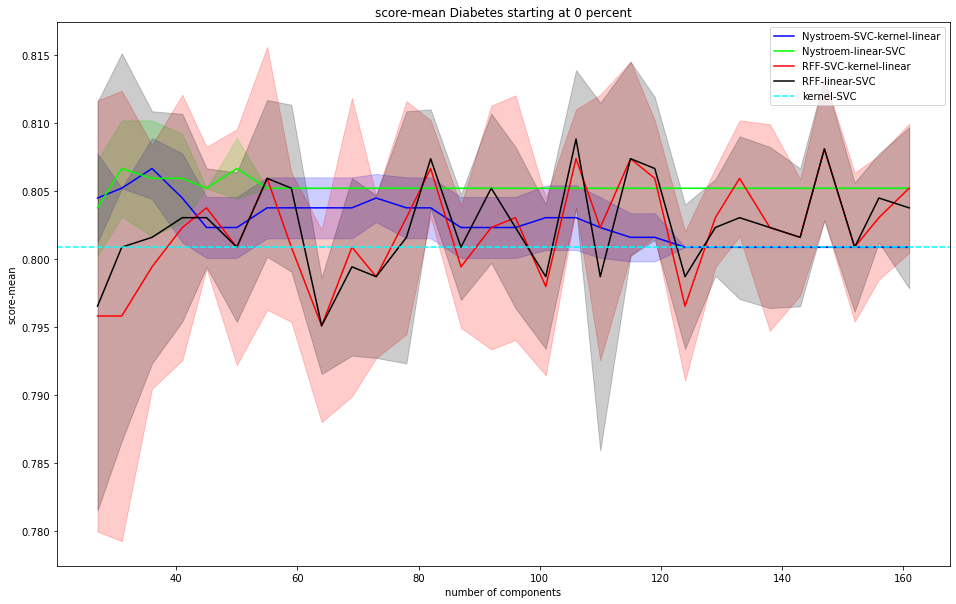

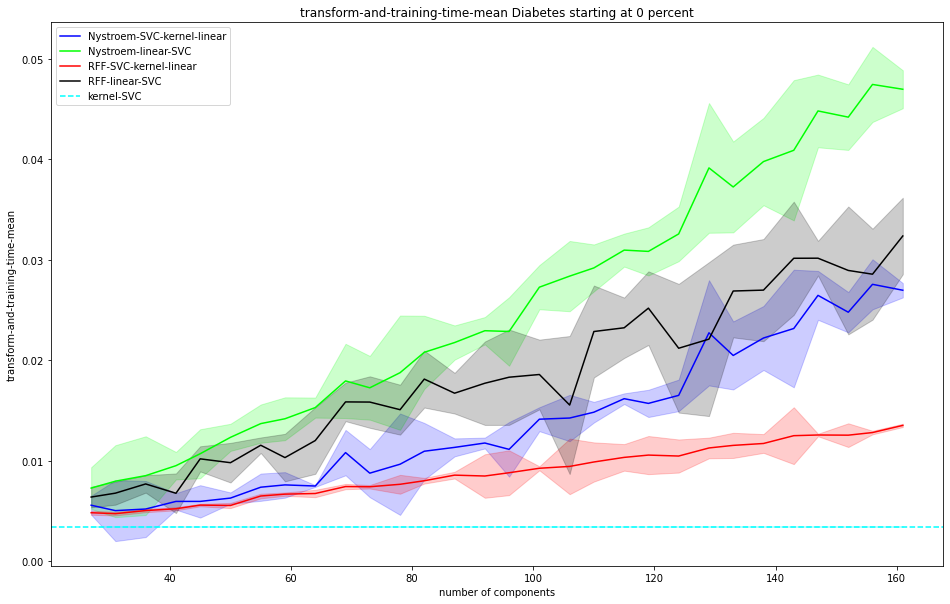

In [23]:
from plotting import view_plots_and_save_them


view_plots_and_save_them(df_list = random_features_list, df_list_names=random_features_list_names, 
                         names_of_std_for_column=std_columns_to_be_plot,
            df_constant=kernel_list, constant_labels=kernel_list_names,
            columns=mean_columns_to_be_plot, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            column_x=n_components_column_name, type='',
            axis_x_name = 'number of components')



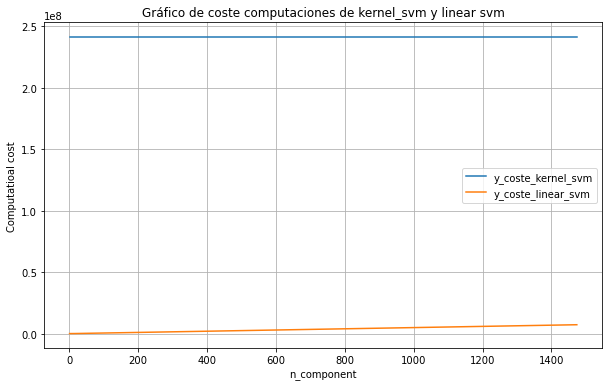

In [24]:
# Gráficos teóricos:

import numpy as np
import matplotlib.pyplot as plt

# Diabetes 
# Crear un rango de valores para x desde 2 hasta 300
n , dimension = 537, 8
x = np.linspace(1,n*0.3, 100)

# Definir las funciones f1(x) y f2(x)
def coste_kernel_svm(X):
    return n**2 * dimension * np.ones(len(X))

def coste_linear_svm(X):
    return n * np.array([max(x,dimension) for x in X])

print
# Especificar la dimensión
dimension = 10  # Reemplaza esto con el valor de dimensión que desees

# Calcular los valores de f1(x) y f2(x) para el rango de x
y_coste_kernel_svm = coste_kernel_svm(x)
y_coste_linear_svm = coste_linear_svm(x) 

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y_coste_kernel_svm, label='y_coste_kernel_svm')
plt.plot(x, y_coste_linear_svm, label='y_coste_linear_svm')

# Configurar el título y etiquetas de los ejes
plt.title('Gráfico de coste computaciones de kernel_svm y linear svm')
plt.xlabel('n_component')
plt.ylabel('Computatioal cost')
plt.legend()  # Mostrar las etiquetas de las funciones

# Mostrar el gráfico
plt.grid(True)
plt.show()
